In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from notebooks.variational_inference.CAVI_GMM import Cavi_GMM

In [16]:
num_components = 3
SAMPLE = 1000

mu_arr = np.random.choice(np.arange(-10, 10, 2),
                          num_components) +\
         np.random.random(num_components)

X = np.random.normal(loc=mu_arr[0], scale=1, size=SAMPLE)
for i, mu in enumerate(mu_arr[1:]):
    X = np.append(X, np.random.normal(loc=mu, scale=1, size=SAMPLE))

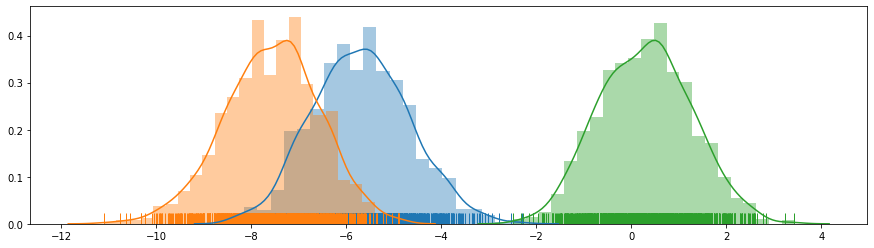

In [17]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(X[:SAMPLE], ax=ax, rug=True)
sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, rug=True)
sns.distplot(X[SAMPLE*2:], ax=ax, rug=True)

In [18]:
vi = Cavi_GMM(x=X, n_mixtures=3, sigma=1)

In [19]:
elbos = vi.fit(100)

Elbo converged at iteration 31 with value of -725.1586340346065


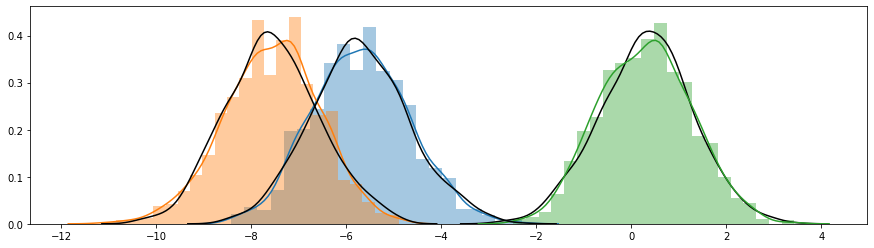

In [20]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(X[:SAMPLE], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(vi.m[0], 1, SAMPLE), color='k', hist=False, kde=True)
sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(vi.m[1], 1, SAMPLE), color='k', hist=False, kde=True)
sns.distplot(X[SAMPLE*2:], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(vi.m[2], 1, SAMPLE), color='k', hist=False, kde=True)